In [178]:
import numpy as np
import pandas as pd
import sklearn
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import roc_auc_score
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

In [55]:
data = pd.read_csv('ecommerceDataset.csv', names=["Label", "Text"])

In [56]:
print(data.head())
print(data.shape)


       Label                                               Text
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...
(50425, 2)


In [57]:
data['Label'].value_counts()/data.shape[0]
data['Label'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Label, dtype: int64

In [60]:
house_data = data[data['Label'] == 'Household'] # Balance the dataset by removing rows with Household label

In [63]:
house_data = house_data.drop(house_data.index[:10000])
house_data.shape

(9313, 2)

In [64]:
data = data.drop(data[data['Label'] == 'Household'].index)


In [65]:
data['Label'].value_counts()

Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Label, dtype: int64

In [67]:
data = pd.concat([data, house_data])

In [68]:
data['Label'].value_counts()

Books                     11820
Electronics               10621
Household                  9313
Clothing & Accessories     8671
Name: Label, dtype: int64

In [69]:
data['Label'] = data.Label.map({'Books':1, 'Electronics':2, 'Household':3, 'Clothing & Accessories':4}) # change labels to numbers

In [70]:
data['Label'].value_counts()


1    11820
2    10621
3     9313
4     8671
Name: Label, dtype: int64

In [71]:
data.shape

(40425, 2)

In [97]:
# processing text
for i in range(5):
    print(data.iloc[i, 1])

Inner Engineering: A Yogi's Guide to Joy About the Author Sadhguru Jaggi VasudevSADHGURU is a yogi, mystic, and visionary who established the Isha Foundation, a nonprofit dedicated to the cultivation of human potential. He belongs to no particular tradition, and his scientific methods for self-transformation have universal appeal. Sadhguru has been an in?uential voice at global forums including the United Nations and the World Economic Forum. He is the author of Inner Engineering (Spiegel & Grau, 2016) and makes his residence in India and Tennessee. For more, visit innerengineering.com.Sadhguru Jaggi VasudevSADHGURU is a yogi, mystic, and visionary who established the Isha Foundation, a nonprofit dedicated to the cultivation of human potential. He belongs to no particular tradition, and his scientific methods for self-transformation have universal appeal. Sadhguru has been an in?uential voice at global forums including the United Nations and the World Economic Forum. He is the author o

In [104]:
print(len(data))

40425


In [150]:
stopwords = _stop_words.ENGLISH_STOP_WORDS
def clean_data(data):
    for i in range(len(data)):
        text = data.iloc[i,1]
        text = re.sub("(\d*\.\d+)|(\d+\.[0-9 ]+)","",str(text))
        text = "".join([char for char in text if char not in string.punctuation])
        text = text.split()
        text = [word.lower() for word in text if word not in stopwords]
        
    return text

In [164]:
def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

In [159]:
X = data.Text
y = data.Label

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40425,) (40425,)
(30318,) (30318,)
(10107,) (10107,)


In [173]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test.astype('U'))
print(X_train_dtm.shape, X_test_dtm.shape)


(30318, 67030) (10107, 67030)


In [175]:
# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

In [176]:
# NAIVE BAYES
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) 

CPU times: total: 31.2 ms
Wall time: 30 ms


Accuracy:  0.955080637182151


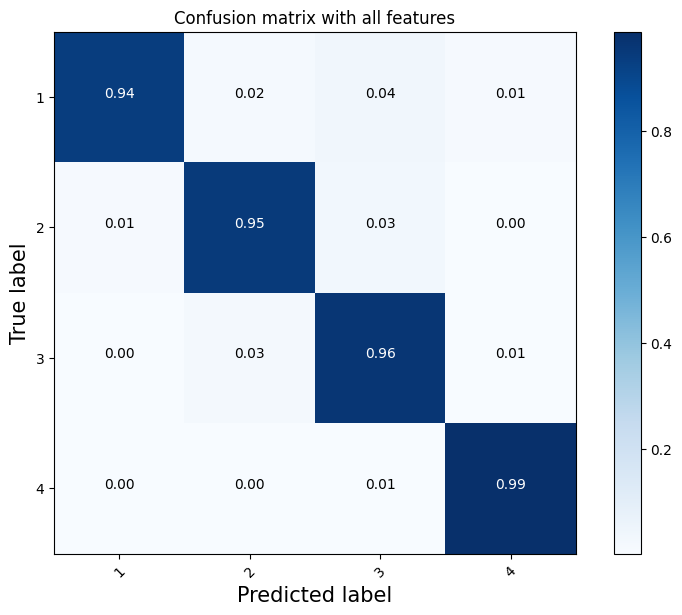

In [181]:
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    
    
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4'],normalize=True,
                      title='Confusion matrix with all features')

# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]


c:\Users\Igor\anaconda3\envs\Git_classification\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.9763530226575641


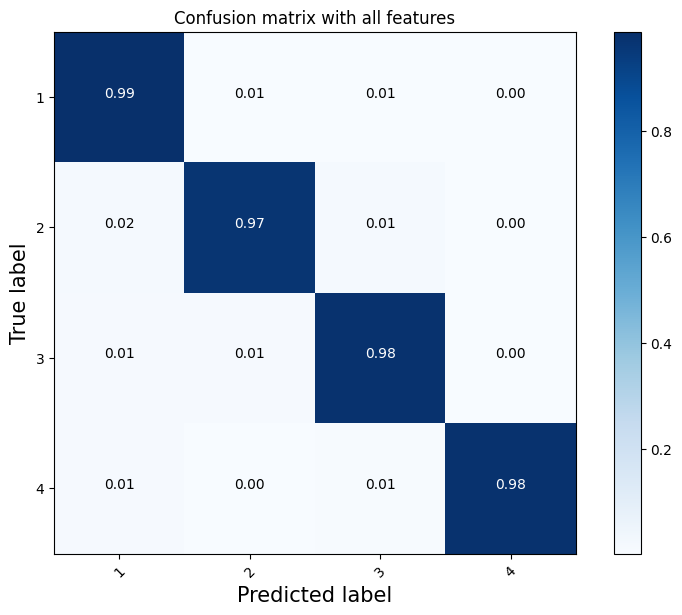

In [184]:
# LOGISTIC REGRESION
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression(class_weight="balanced") 
logreg.fit(X_train_dtm, y_train) 


y_pred_class = logreg.predict(X_test_dtm)
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4'],normalize=True,
                      title='Confusion matrix with all features')

c:\Users\Igor\anaconda3\envs\Git_classification\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy:  0.9760561986741862


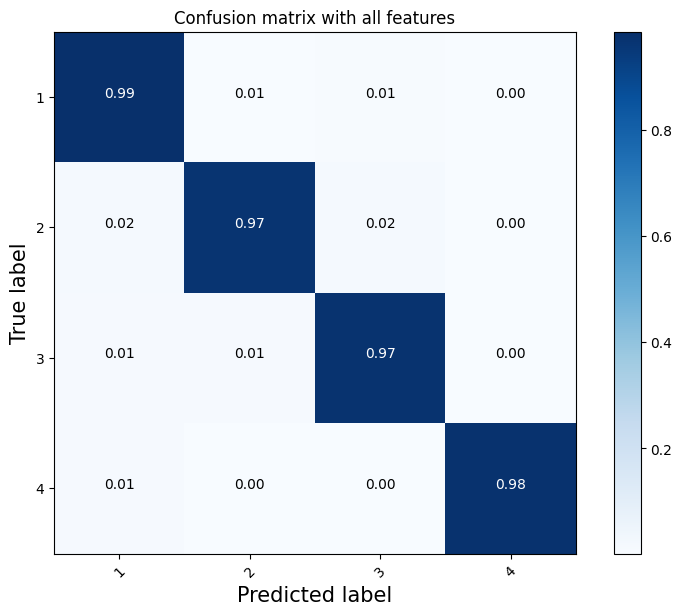

In [186]:
# LINEAR SVC
from sklearn.svm import LinearSVC


classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4'],normalize=True,
                      title='Confusion matrix with all features')